# Bài 10: Review statistics - Part 2

Update `seaborn`: open terminal and type: `pip install seaborn --upgrade`

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-whitegrid")

## 1. Review previous lesson

In the previous lesson, we looked at **univariate data** (one-variable)

### 1.1. Data types in theory
- **Qualitative:**
    - Nominal: e.g. sex (male, female)
    - Ordinal: e.g. satisfaction (unhappy, neutral, happy)
- **Quantitative:**
    - Discrete: e.g. number of children (1, 2, 3, ...)
    - Continuous: e.g. salary (100,230.1332, 87,355.07, ...)
    
### 1.2. Data types in practice
- **Categorical** (Nominal, Ordinal, Discrete): 
    - Often treat discrete variable with a small number of unique values as categorical
- **Continuous** (Continuous, Discrete): 
    - Often treat discrete variable with a large number of unique values as continuous

### 1.3. Look at categorical types
- **Summary statistics:** 
    - Mode
- **Distribution**:
    - Tables:
        - Frequency table (in absolute counts)
        - Relative frequency table (in %)
    - Graph:
        - Bar charts
        - Pie charts
        
### 1.4. Look at continous types
- **Summary statistics:** 
    - Measures of locations:
        - Mean (mean, weighted mean, trimmed mean)
        - Median
        - Percentile, quantile
        
    - Measures of variability (or spread)
        - Range
        - IQR
        - Variance
        - Standard deviation
        
- **Distribution**:
    - Tables:
        - Binned frequency tables
        - Binned relative frequency tables
    - Graph:
        - Histograms
        - KDEs
        - Box plots

## 2. Bivariate data

- Bivariate data: two-variable data
- Now we look at 2 variable at the same time and see how they relate to each other
- Possible combinationss:
    - Cat vs. Cat
    - Cat vs. Cont
    - Cont vs. Cont
- Distribution:
    - Univariate (scalar): 
        - Possible values (domain): $X \in \{1, 2, 3, \dots \}$
        - Distribution: how data are distributed into different values in domain
    - Bivariate (2-vector): 
        - Possible values (domain): $(X, Y) \in \{(1, 1), (1, 2), (1, 3), \dots \}$
        - Distribution: how data are distributed into different values in domain (or different combinations of X and Y)
    - Multivariate (n-vector):
        - Possible values (domain): $(X_1, X_2, \dots, X_n) \in \{(1, 1, \dots, 1), (1, 1, \dots, 2) \dots \}$
        - Distribution: how data are distributed into different values in domain (or different combinations of X and Y)
        - That's why we need matrix algebra

## 3. Categorical vs. categorical

### 3.1. Look at cat-cat distributions via tables

#### A. Contingency tables
- Just frequency table for a bivariate categorical variable
- Synonym: cross table
- How it looks like:
    - Rows: lists all levels for var 1
    - Columns: lists all levels for var 2
    - Cells: each cell represent the count for observations belong to a specific combination of var 1 and var 2

In [2]:
# Load data
tips = sns.load_dataset("tips")
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


- Cách 1: `.groupby()` -> long format

In [3]:
tips.groupby(["smoker", "time"]).size()

smoker  time  
Yes     Lunch      23
        Dinner     70
No      Lunch      45
        Dinner    106
dtype: int64

- Cách 2: `pd.crosstab()` -> wide format

In [4]:
pd.crosstab(tips["smoker"], tips["time"])

time,Lunch,Dinner
smoker,,
Yes,23,70
No,45,106


- Thực hành với các biến khác

In [5]:
# Review data
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [6]:
# Sex vs. smoker


In [7]:
# Sex vs. time


In [8]:
# Day vs. time


#### B. Relative contingency tables
- Similar to contingency talble, but the cells is proportions/percentages instead of absolute counts

In [9]:
# In proportion
pd.crosstab(tips["sex"], tips["time"], normalize=True)

time,Lunch,Dinner
sex,,
Male,0.135246,0.508197
Female,0.143443,0.213115


In [10]:
# In percentage
pd.crosstab(tips["smoker"], tips["time"], normalize=True) * 100

time,Lunch,Dinner
smoker,,
Yes,9.426230,28.688525
No,18.442623,43.442623


### 3.2. Look at cat-cat distributions via graphs

- Mostly use bar charts
- Just like univariate categorical data, but bar charts in this case must display 2 variables at the same time
- All kinds of bar charts:
    - Dodge bar chart
    - Stacked bar chart

#### A. Dodge bar charts

Example 1

In [11]:
plot_data = pd.crosstab(tips["smoker"], tips["time"])
plot_data

time,Lunch,Dinner
smoker,,
Yes,23,70
No,45,106


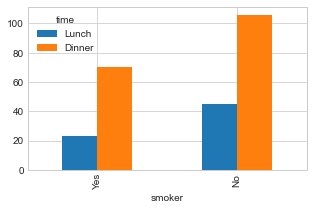

In [12]:
# Index goes to grand bars in x axis
# Pandas auto use different colors to fill for diffrent columns
# Rember pandas expect a wide format
fig, ax = plt.subplots(figsize=(5, 3))
plot_data.plot.bar(ax=ax)
plt.show()

Example 2: swap the variables

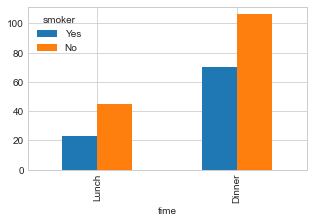

In [13]:
# Prepare data
plot_data = pd.crosstab(tips["time"], tips["smoker"])

# Plot
fig, ax = plt.subplots(figsize=(5, 3))
plot_data.plot.bar(ax=ax)
plt.show()

Example 3: Plot proportion

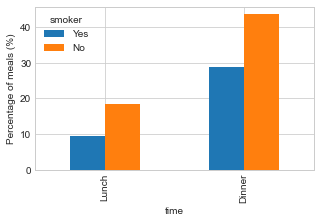

In [14]:
# Prepare data
data = pd.crosstab(tips["time"], tips["smoker"], normalize=True) * 100

# Plot
fig, ax = plt.subplots(figsize=(5, 3))
data.plot.bar(ax=ax)
ax.set_ylabel("Percentage of meals (%)")
plt.show()

Thực hành với các biến khác 

In [15]:
# Sex vs. smoker


In [16]:
# Sex vs. time


In [17]:
# Day vs. time


Example 3: flip the bar

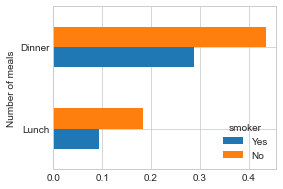

In [18]:
# Prepare data
data = pd.crosstab(tips["time"], tips["smoker"], normalize=True)

# Plot
fig, ax = plt.subplots(figsize=(4, 3))
data.plot.barh(ax=ax)
ax.set_ylabel("Number of meals")
plt.show()

Example 4: more than just 2 levels

In [19]:
# Prepare data
plot_data = pd.crosstab(tips["size"], tips["smoker"])
plot_data

smoker,Yes,No
size,,
1,2,2
2,66,90
3,12,26
4,11,26
5,2,3
6,0,4


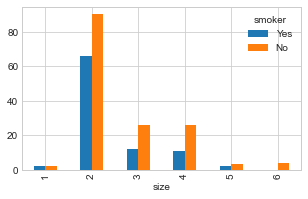

In [20]:
# Plot 
fig, ax = plt.subplots(figsize=(5, 3))
plot_data.plot.bar(ax=ax) # Grand bars
plt.show()

Example 5: Another representation

In [21]:
# Prepare data
plot_data = pd.crosstab(tips["smoker"], tips["size"])
plot_data

size,1,2,3,4,5,6
smoker,,,,,,
Yes,2,66,12,11,2,0
No,2,90,26,26,3,4


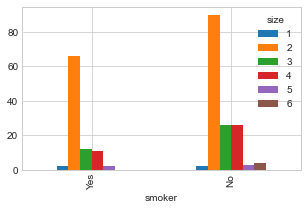

In [22]:
# Plot 
fig, ax = plt.subplots(figsize=(5, 3))
plot_data.plot.bar(ax=ax) # Grand bars
plt.show()

#### Giới thiệu `seaborn`

In [23]:
# Prepare data (long format)
data = tips.groupby(["size", "smoker"]).size().reset_index().rename(columns={0: "count"})
data.head()

,size,smoker,count
0,1,Yes,2
1,1,No,2
2,2,Yes,66
3,2,No,90
4,3,Yes,12


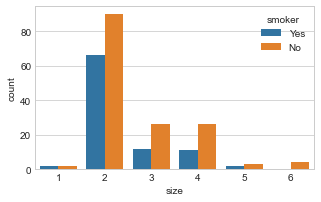

In [24]:
# Plot 1
fig, ax = plt.subplots(figsize=(5, 3))

sns.barplot(
    x="size",
    y="count",
    hue="smoker",
    data=data,
    ax=ax
)

plt.show()

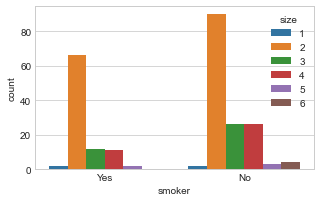

In [25]:
# Plot 2
fig, ax = plt.subplots(figsize=(5, 3))

sns.barplot(
    x="smoker",
    y="count",
    hue="size",
    data=data,
    ax=ax
)

plt.show()

#### B. Stacked bar charts

Example 1: Stacked bar chart

In [26]:
# Data
plot_data = pd.crosstab(tips["time"], tips["smoker"])
plot_data

smoker,Yes,No
time,,
Lunch,23,45
Dinner,70,106


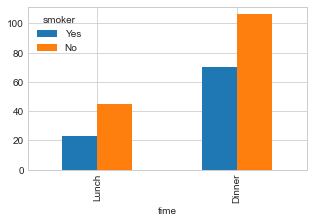

In [27]:
# Dodge bar plot
fig, ax = plt.subplots(figsize=(5, 3))
plot_data.plot.bar(ax=ax)
plt.show()

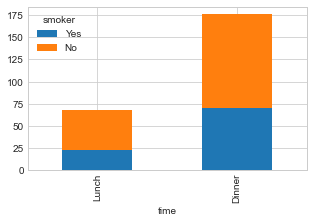

In [28]:
# Stacked
fig, ax = plt.subplots(figsize=(5, 3))
plot_data.plot.bar(stacked=True, ax=ax)
plt.show()

Example 2: Normalized (100%) stacked bar chart

In [29]:
# Absolute count
pd.crosstab(tips["time"], tips["smoker"])

smoker,Yes,No
time,,
Lunch,23,45
Dinner,70,106


In [30]:
# Relative count for each row
plot_data = pd.crosstab(tips["time"], tips["smoker"])
plot_data = plot_data.apply(lambda row: row / row.sum(), axis=1) * 100
plot_data

smoker,Yes,No
time,,
Lunch,33.823529,66.176471
Dinner,39.772727,60.227273


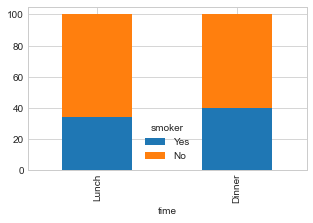

In [31]:
# Plot
fig, ax = plt.subplots(figsize=(5, 3))
plot_data.plot.bar(stacked=True, ax=ax)
plt.show()

Example 3: Tương tự cho `smoker` và `size`

In [32]:
# Data
plot_data = pd.crosstab(tips["smoker"], tips["size"])
plot_data = plot_data.apply(lambda row: row / row.sum(), axis=1)
plot_data

size,1,2,3,4,5,6
smoker,,,,,,
Yes,0.021505,0.709677,0.129032,0.118280,0.021505,0.00000
No,0.013245,0.596026,0.172185,0.172185,0.019868,0.02649


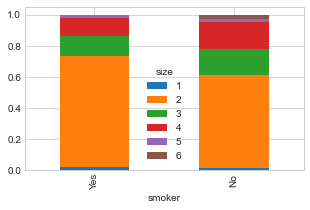

In [33]:
# Plot
fig, ax = plt.subplots(figsize=(5, 3))
plot_data.plot.bar(stacked=True, ax=ax)
plt.show()

#### C. How about 3 categorical variables at the same time?
- Advanced concept: facetting

In [34]:
# Data
plot_data = pd.crosstab(tips["size"], [tips["smoker"], tips["time"]])
plot_data

smoker   Yes           No       
time   Lunch Dinner Lunch Dinner
size                            
1          1      1     1      1
2         18     48    34     56
3          2     10     3     23
4          2      9     3     23
5          0      2     1      2
6          0      0     3      1

In [35]:
# Subset level 1
plot_data["Yes"]

time,Lunch,Dinner
size,,
1,1,1
2,18,48
3,2,10
4,2,9
5,0,2
6,0,0


- Plot using 2 subplots

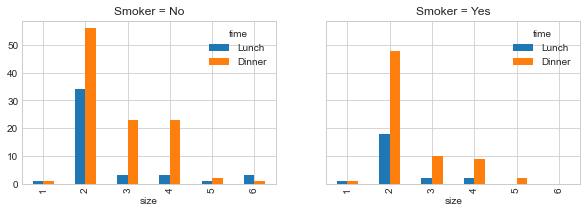

In [36]:
# 1 row, 2 cols
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(10, 3))

# No on the left
plot_data["No"].plot.bar(ax=ax[0])
ax[0].set_title("Smoker = No")

# Yes on the right
plot_data["Yes"].plot.bar(ax=ax[1])
ax[1].set_title("Smoker = Yes")

# Show
plt.show()

## 4. Categorical vs. Continous
- Actually, it just like looking at the continuous variable for different level of categorical variable
- Therefore we still have:
    - Measure of locations: min, max, mean, median, quantile, percentile
    - Measure of spread: range, iqr, variance, std

### 4.1. Look at cat-cont distributions via summary stats

- Example 1: Summary statistics

In [37]:
# Tip by sex
tips.groupby("sex")["tip"].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Male,157.0,3.089618,1.489102,1.0,2.0,3.00,3.76,10.0
Female,87.0,2.833448,1.159495,1.0,2.0,2.75,3.50,6.5


In [38]:
# Tip by time
tips.groupby("time")["tip"].describe()

,count,mean,std,min,25%,50%,75%,max
time,,,,,,,,
Lunch,68.0,2.728088,1.205345,1.25,2.0,2.25,3.2875,6.7
Dinner,176.0,3.102670,1.436243,1.00,2.0,3.00,3.6875,10.0


In [39]:
# Tip by day


In [40]:
# Tip by size


In [41]:
# Tip by smoker

- Example 2: quantile / percentile

In [42]:
# 10th and 90th percentile
tips.groupby("time")["tip"].quantile([0.1, 0.9])

time       
Lunch   0.1    1.50
        0.9    4.44
Dinner  0.1    1.53
        0.9    5.00
Name: tip, dtype: float64

### 4.2. Look at cat-cont distributions via graphs
- Just like summary stats, we look at the graph of the continuous variable for different levels of the categorical variable
- Therefore, we have:
    - Histograms
    - KDEs
    - Boxplots

#### A. Histograms

In [43]:
# Review data
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


- Example 1: Histogram of `tip`

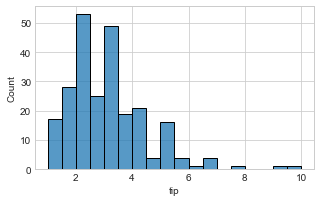

In [44]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.histplot(
    x="tip",
    data=tips,
    ax=ax
)

plt.show()

- Example 2: Histogram of `tip` by `time`

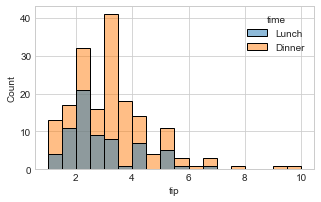

In [45]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.histplot(
    x="tip",
    hue="time",
    data=tips,
    ax=ax
)

plt.show()

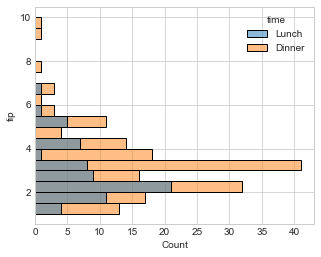

In [46]:
# Flip the plot
fig, ax = plt.subplots(figsize=(5, 4))
sns.histplot(
    y="tip",
    hue="time",
    data=tips,
    ax=ax
)

plt.show()

- Example 3: adjust number of bins

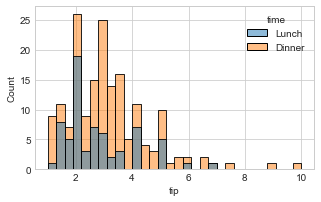

In [47]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.histplot(
    x="tip",
    hue="time",
    data=tips,
    bins=30,
    ax=ax
)

plt.show()

#### B. KDEs
- KDEs always is in normalized form (i.e. area under the curve is 1)
- Therefore, if we want to overlay a KDE on top of a histogram, we must set `density=1` for the histogram

- Example 1: KDE of `tip`

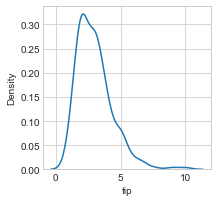

In [48]:
fig, ax = plt.subplots(figsize=(3, 3))
sns.kdeplot(
    x="tip",
    data=tips,
    ax=ax
)

plt.show()

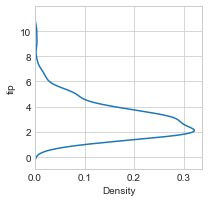

In [49]:
# Flip the plot
fig, ax = plt.subplots(figsize=(3, 3))
sns.kdeplot(
    y="tip",
    data=tips,
    ax=ax
)

plt.show()

- Example 3: KDE of `tip` by `smoker`

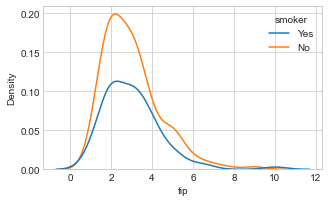

In [50]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.kdeplot(
    x="tip",
    hue="smoker",
    data=tips,
    ax=ax
)

plt.show()

- Example 3: KDE of `tip` by `day`

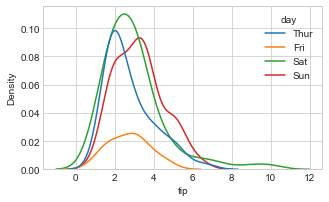

In [51]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.kdeplot(
    x="tip",
    hue="day",
    data=tips,
    ax=ax
)

plt.show()

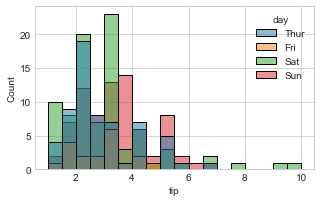

In [52]:
# Compare the above plot with histogram
# KDE is more appropriate
fig, ax = plt.subplots(figsize=(5, 3))
sns.histplot(
    x="tip",
    hue="day",
    data=tips,
    ax=ax
)

plt.show()

#### C. Boxplots

- Example 1: box plot of `tip`

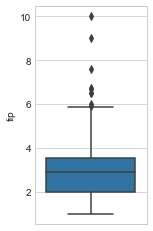

In [53]:
fig, ax = plt.subplots(figsize=(2, 4))
sns.boxplot(
    y="tip",
    data=tips,
    ax=ax
)

plt.show()

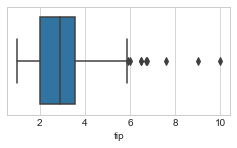

In [54]:
# Flip the plot
fig, ax = plt.subplots(figsize=(4, 2))
sns.boxplot(
    x="tip",
    data=tips,
    ax=ax
)

plt.show()

- Example 2: boxplot of `tip` by `sex`

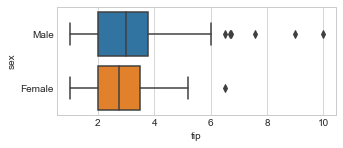

In [55]:
fig, ax = plt.subplots(figsize=(5, 2))
sns.boxplot(
    y="sex",
    x="tip",
    data=tips,
    ax=ax
)

plt.show()

- Example 3: boxplot of `tip` by `time`

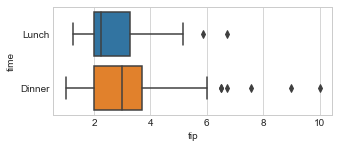

In [56]:
fig, ax = plt.subplots(figsize=(5, 2))
sns.boxplot(
    y="time",
    x="tip",
    data=tips,
    ax=ax
)

plt.show()

- Example 3: boxplot of `tip` by `day`

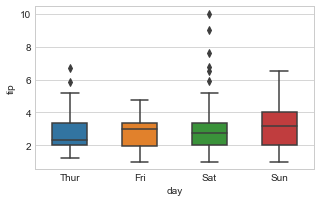

In [57]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.boxplot(
    x="day",
    y="tip",
    data=tips,
    width=0.5,
    ax=ax
)

plt.show()

In [58]:
# Double check
tips.groupby("day")["tip"].agg(["median", "std"])

,median,std
day,,
Thur,2.305,1.240223
Fri,3.000,1.019577
Sat,2.750,1.631014
Sun,3.150,1.234880


#### D. Violin plots

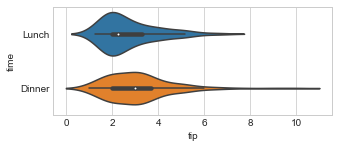

In [59]:
# Similar to a combination of boxplot + KDE
fig, ax = plt.subplots(figsize=(5, 2))
sns.violinplot(
    y="time",
    x="tip",
    data=tips,
    ax=ax
)

plt.show()

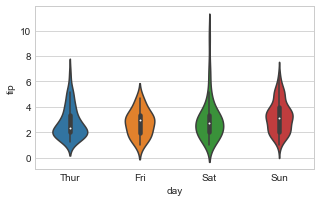

In [60]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.violinplot(
    x="day",
    y="tip",
    data=tips,
    width=0.5,
    ax=ax
)

plt.show()

## 5. Continous vs. Continous

### 4.1. Look at cont-cont distributions via summary stats
- Often we want to see how 2 continuous variables move together
- To capture the linear correlation we use Pearson's correlation coefficients

$$r =\frac{\Sigma_1^n (x_i - \bar{x})(y_i - \bar{y})}{(n - 1)s_x s_y}$$

- $r$ is between $[-1, 1]$
- Sign indicates the direction of the linear relationship
- Absolute value indicates the magnitude of the linear relationship
    - $r = 1$: perfect positive linear correlation
    - $r = -1$: perfect negative linear correlation
    - $r = 0$: no linear correlation
- Note: 
    - Pearson corr only capture the linearity, not all kind of relationship
    - Correlation != causation (e.g. icecream consumption vs. drowning)

- Example 1: correlation between `tip` and `total_bill`

In [61]:
# Corr matrix
np.corrcoef(tips["tip"], tips["total_bill"])

array([[1.        , 0.67573411],
       [0.67573411, 1.        ]])

In [62]:
# Get corr between tip and total_bill
np.corrcoef(tips["tip"], tips["total_bill"])[0, 1]

0.6757341092113641

- Example 2: see all correlation values among numeric variables

In [63]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


- Example 3: correlation conditioned on categorical variable

In [64]:
tips.groupby("smoker").corr()

total_bill       tip      size
smoker                                           
Yes    total_bill    1.000000  0.488218  0.527890
       tip           0.488218  1.000000  0.332227
       size          0.527890  0.332227  1.000000
No     total_bill    1.000000  0.822183  0.688068
       tip           0.822183  1.000000  0.580107
       size          0.688068  0.580107  1.000000

### 4.1. Look at cont-cont distributions via plots


#### A. Scatter plot

- Example 1: tip vs. total bill

In [65]:
# Review data
# Cannot see pattern from this
tips.loc[:, ["tip", "total_bill"]]

,tip,total_bill
0,1.01,16.99
1,1.66,10.34
2,3.50,21.01
3,3.31,23.68
4,3.61,24.59
...,...,...
239,5.92,29.03
240,2.00,27.18
241,2.00,22.67
242,1.75,17.82


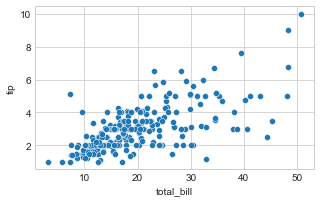

In [66]:
fig, ax = plt.subplots(figsize=(5, 3))

sns.scatterplot(
    x="total_bill",
    y="tip",
    data=tips,
    ax=ax
)

plt.show()

- Example 2: `tip` vs. `size`

Example 2: size vs total bill

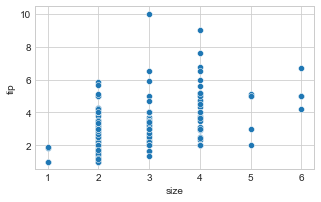

In [67]:
fig, ax = plt.subplots(figsize=(5, 3))

sns.scatterplot(
    x="size",
    y="tip",
    data=tips,
    ax=ax
)

plt.show()

- Example 3: `total_bill` vs. `size`

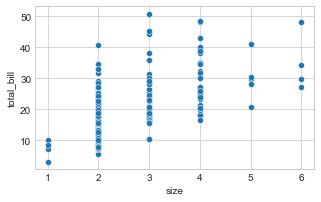

In [68]:
fig, ax = plt.subplots(figsize=(5, 3))

sns.scatterplot(
    x="size",
    y="total_bill",
    data=tips,
    ax=ax
)

plt.show()

- Example 4: combine with categorical variable 

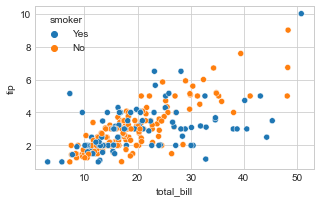

In [69]:
# Tip vs. total_bill conditioned on smoker
fig, ax = plt.subplots(figsize=(5, 3))

sns.scatterplot(
    x="total_bill",
    y="tip",
    hue="smoker",
    data=tips,
    ax=ax
)

plt.show()

In [70]:
# Compare with correlation matrix
tips.groupby("smoker").corr()

total_bill       tip      size
smoker                                           
Yes    total_bill    1.000000  0.488218  0.527890
       tip           0.488218  1.000000  0.332227
       size          0.527890  0.332227  1.000000
No     total_bill    1.000000  0.822183  0.688068
       tip           0.822183  1.000000  0.580107
       size          0.688068  0.580107  1.000000

- Example 5: replicate the above examples for `sex`, `time`

#### B. Regression plot

- Example 1

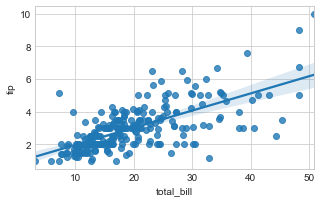

In [71]:
fig, ax = plt.subplots(figsize=(5, 3))

sns.regplot(
    x="total_bill",
    y="tip",
    data=tips,
    ax=ax
)

plt.show()

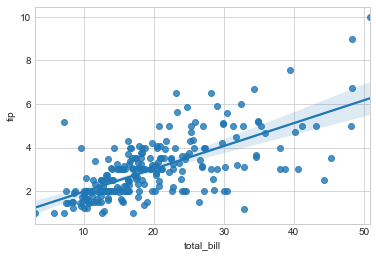

In [72]:
sns.regplot(data=tips, x="total_bill", y="tip")
plt.show()

- Example 2: intergrate categorcial data

In [73]:
# Prepare data
tips1 = tips.loc[tips["smoker"] == "Yes", :]
tips2 = tips.loc[tips["smoker"] == "No", :]

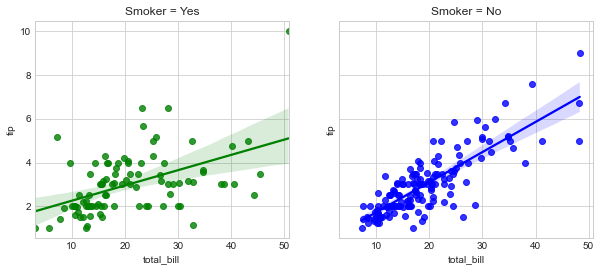

In [74]:
# 1 row, 2 cols
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 4))

# Smoker on the left
sns.regplot(data=tips1, x="total_bill", y="tip", color="green", ax=ax[0])
ax[0].set_title("Smoker = Yes")

# None-smoker on the right
sns.regplot(data=tips2, x="total_bill", y="tip", color="blue", ax=ax[1])
ax[1].set_title("Smoker = No")

plt.show()

In [75]:
# Double check
tips.groupby("smoker").corr()

total_bill       tip      size
smoker                                           
Yes    total_bill    1.000000  0.488218  0.527890
       tip           0.488218  1.000000  0.332227
       size          0.527890  0.332227  1.000000
No     total_bill    1.000000  0.822183  0.688068
       tip           0.822183  1.000000  0.580107
       size          0.688068  0.580107  1.000000

- Example 3: using size

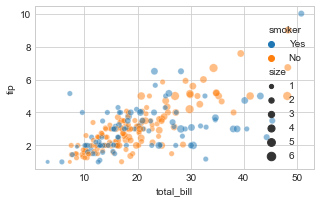

In [76]:
# Tip vs. total_bill conditioned on smoker
fig, ax = plt.subplots(figsize=(5, 3))

sns.scatterplot(
    x="total_bill",
    y="tip",
    hue="smoker",
    size="size",
    alpha=0.5,
    data=tips,
    ax=ax
)

plt.show()

## 6. Multi-plot grids with Seaborn
- 3 configurable element: row, col, hue
- Advanced: can skip for now

- Example 1

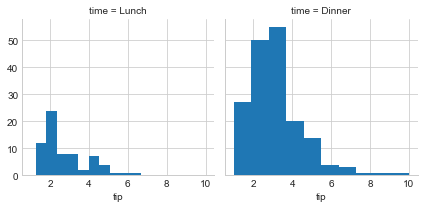

In [77]:
# Khởi tạo grid bằng cách chia thành 2 cột cho 2 levels của cột time
g = sns.FacetGrid(tips, col="time")

# Vẽ hist của tip cho từng level của time
g.map(plt.hist, "tip")

plt.show()

- Example 2

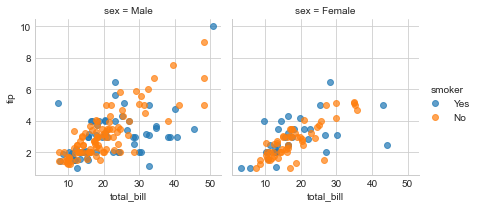

In [78]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(plt.scatter, "total_bill", "tip", alpha=.7)
g.add_legend()
plt.show()

- Example 3

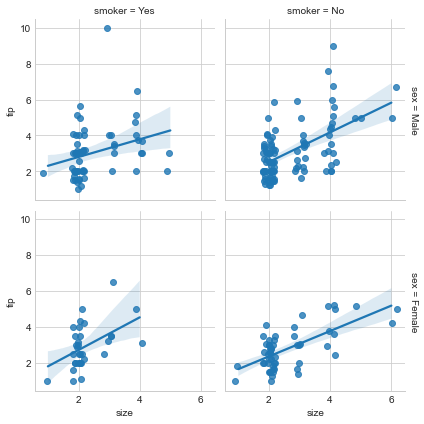

In [79]:
g = sns.FacetGrid(tips, row="sex", col="smoker", margin_titles=True)
g.map(sns.regplot, "size", "tip", fit_reg=True, x_jitter=.2)
plt.show()